# Pymaceuticals Inc.
---

### Analysis

- According to the data, gender does not seem to be a factor in the results as the gender ratio was pretty even at 49% female and 51% male. The only data set that has an outlier is Infubinol drug data set. We can conclude that the data gathered is quite consistent as there are virtually no outliers and therefore the results between the tumor volume and the drugs chosen can be said to be accurate. This supports the Capomulin treatment of mouse l509, which indicates that the tumor volume seems to diminish as the days progress. There is a slight increase after a decrease, but ultimately the tumor size is getting smaller according to the line graph. The scatter plot also shows a positive correlation between the average weight of the mouse and the average size of the tumor. With this data, we can conclude that the tumor size is dependent on the weight of the subject and Capomulin specifically decreases the volume of the tumor over time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files | Path to the data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results | Using read_csv to read the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
mice_number = len(mouse_study_df['Mouse ID'].unique())
print(mice_number)

249


In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#Takes the duplicate mice from previous block and find it's ID then set the ID to be equal to the duplicate mice that's 1st in the index
dup_mice_ID = mouse_study_df.loc[duplicate_mice, 'Mouse ID'].unique()
duplicated_ID_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == dup_mice_ID[0]]
duplicated_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_study_df.drop(duplicated_ID_df.index)
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice = len(clean_mice_df['Mouse ID'].unique())
print(new_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = clean_mice_df.groupby('Drug Regimen')
tumor_vol_mean = drug_regimen_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = drug_regimen_df['Tumor Volume (mm3)'].median()
tumor_vol_var = drug_regimen_df['Tumor Volume (mm3)'].var()
tumor_vol_std = drug_regimen_df['Tumor Volume (mm3)'].std()
tumor_vol_SEM = drug_regimen_df['Tumor Volume (mm3)'].sem()
single_sum_df = pd.DataFrame([tumor_vol_mean, tumor_vol_median, tumor_vol_var, tumor_vol_std, tumor_vol_SEM]).T
single_sum_df.columns = ['Mean', 'Median', 'Variance', 'STD', 'SEM']
single_sum_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# summary_stat produces the same summary statistics in a single line. The summary_agg just renames the columns. 
summary_stat = drug_regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg = summary_stat.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
summary_agg


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

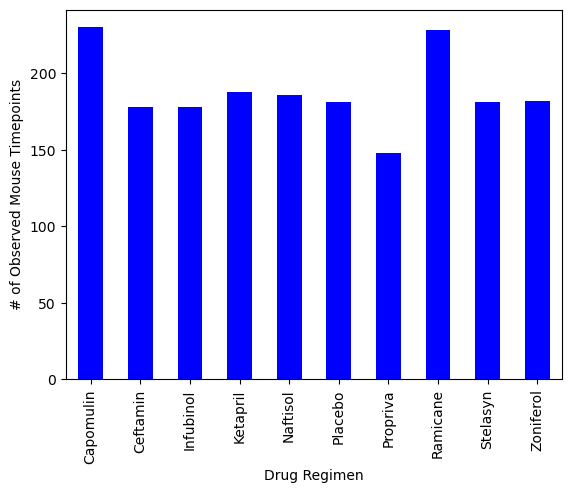

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_rows = drug_regimen_df['Drug Regimen'].value_counts()
plot_mice = mice_rows.plot.bar(color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

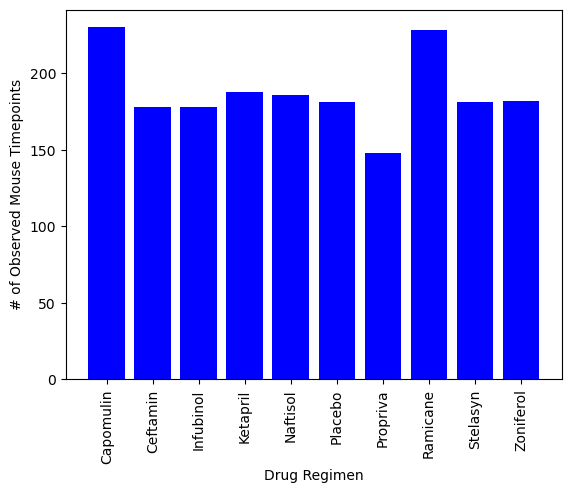

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_rows.index.values
y_axis = mice_rows.values
plt.bar(x_axis, y_axis, color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, '')

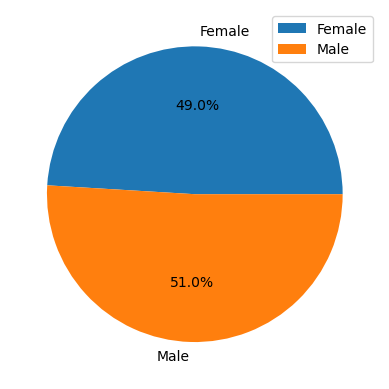

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_mice_df.groupby(['Sex']).count()
mice_sex.plot(kind='pie', y='Mouse ID', x='Sex', autopct='%1.1f%%')
plt.ylabel('')

([<matplotlib.patches.Wedge at 0x1731749b380>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

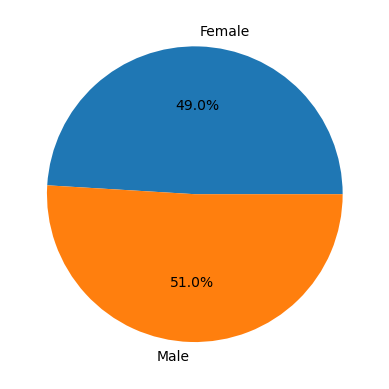

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_plot = mice_sex['Mouse ID'].tolist()
gender = ['Female', 'Male']
plt.pie(mice_sex_plot, labels = gender, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol = clean_mice_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_vol_2 = final_tumor_vol.reset_index() 
final_tumor_vol_2

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for drug in drug_treatments:
    final_tumor_vol = final_tumor_vol_2.loc[final_tumor_vol_2['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

    # Sets the variable quartiles and the rest calculates the different quartiles
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Outlier is outside of the bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{drug}")
    print(f"{drug}'s potential outliers are below {round(lower_bound, 3)}.")
    print(f"{drug}'s potential outliers are above {round(upper_bound, 3)}.")
    # Printed the mean to show the average between the quartiles.
    print(f"{drug}'s average tumor volume is {round(mean, 3)}.")
    print(f"{drug} has {outliers.count()} outliers.")

    if outliers.count() > 0:
        for i in outliers.index:
            print(f"The outlier for {drug} is {round(outliers[i], 3)}")
    

Capomulin
Capomulin's potential outliers are below 20.705.
Capomulin's potential outliers are above 51.832.
Capomulin's average tumor volume is 36.668.
Capomulin has 0 outliers.
Ramicane
Ramicane's potential outliers are below 17.913.
Ramicane's potential outliers are above 54.307.
Ramicane's average tumor volume is 36.191.
Ramicane has 0 outliers.
Infubinol
Infubinol's potential outliers are below 36.833.
Infubinol's potential outliers are above 82.741.
Infubinol's average tumor volume is 58.178.
Infubinol has 1 outliers.
The outlier for Infubinol is 36.321
Ceftamin
Ceftamin's potential outliers are below 25.355.
Ceftamin's potential outliers are above 87.666.
Ceftamin's average tumor volume is 57.754.
Ceftamin has 0 outliers.


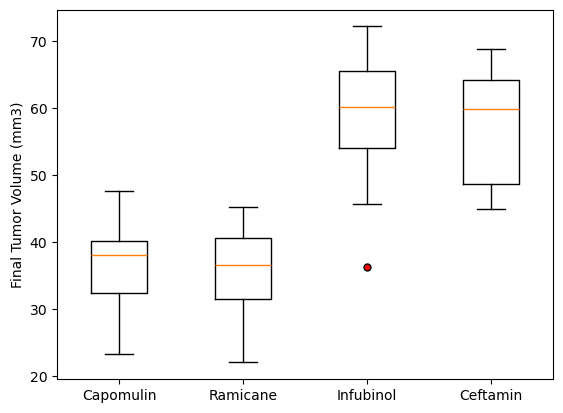

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol_list, labels=drug_treatments, flierprops={'markerfacecolor':'r','markersize': 5})
tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

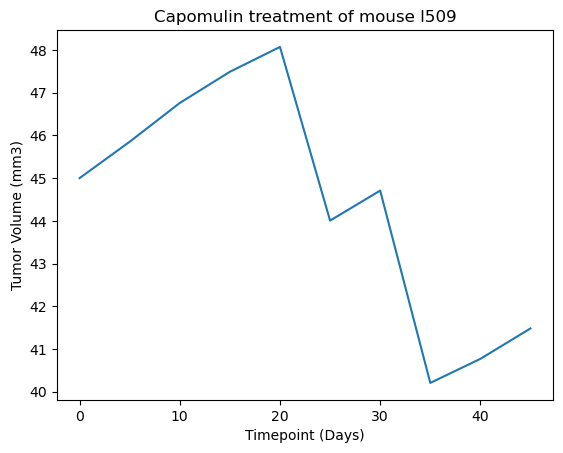

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Set to make sure we take the single mouse from the Capomulin set.
capomulin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
single_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]
timepoint_tum_vol = plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.title(f"Capomulin treatment of mouse l509")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



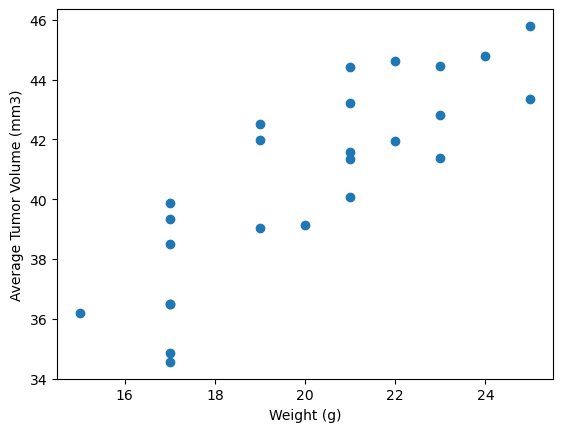

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_plot = capomulin_df.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_weight = capomulin_plot.groupby(['Mouse ID'])['Weight (g)'].unique()
capomulin_average = capomulin_plot.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
plt.scatter(capomulin_weight, capomulin_average)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


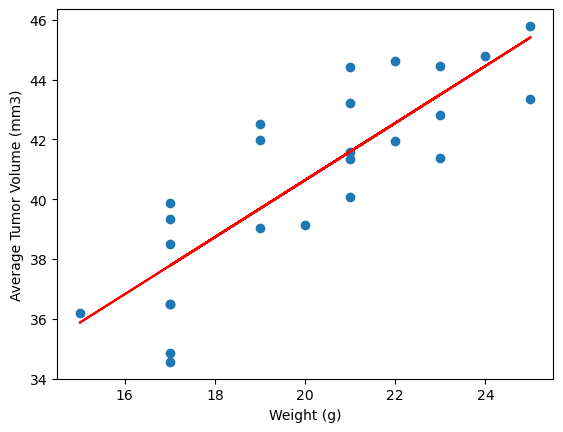

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = capomulin_plot.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = correlation['Weight (g)']
mouse_avg_tumor = correlation['Tumor Volume (mm3)']
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight, mouse_avg_tumor)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, mouse_avg_tumor)
regress = mouse_weight * slope + intercept
line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(mouse_weight, mouse_avg_tumor)
plt.plot(mouse_weight, regress,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()